# Average True Range

| Metric | Selected paramaters | All paramaters |
| ---: | :---: | :---: |
| Precision | 0.211| 0.139|
| Recall |0.250 | 0.251|
| F1 |0.083 |0.079 |

| Name | Correlation | Importance |
| --- | :---: | :---: |
| atr_o_close | 0.21 | 0.085|
| atr_14 | 0.19 | 0.049|
| atr_200 | 0.18 | 0.124|
| atr_100 | 0.19 | 0.101|
| atr_50 | 0.19 | 0.084|
| atr_ma_2 | 0.19 | 0.096|



The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

**About and calculation**:
- Originally made for commodities market which had caps for how volatile they can be. 
- Does not provide indication of price direction, just for volatility. 
- True Range: Current high or low subtract most recent close. Take largest absolute value. 
- ATR usually average of 14 True Ranges

**Usage**: 
- ATR can be used to validate the enthusiasm behind a move or breakout. A bullish reversal with an increase in ATR would show strong buying pressure and reinforce the reversal. A bearish support break with an increase in ATR would show strong selling pressure and reinforce the support break.

**Notes**: 
- ATR is not a directional indicator like MACD or RSI, but rather a unique volatility indicator that reflects the degree of interest or disinterest in a move. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volatility import AverageTrueRange

In [2]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

Results: 
- High base variation of 0.19
- High correlations between variations, thus will use default window of 14. 

In [3]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "atr_"
    for w in windows:
        atr = AverageTrueRange(df["high"], df["low"], df["close"], w)
        df[name + str(w)] = atr.average_true_range()

In [4]:
variations([10, 14, 20, 50, 100, 200])

In [6]:
df["atr_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df.atr_14))

In [7]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,target,atr_10,atr_14,atr_20,atr_50,atr_100,atr_200,atr_log
0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,202366.138393,171,35.160503,150952.477943,7887.635513,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,100304.823567,102,21.448071,92608.279728,8039.262402,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,31282.312670,36,4.802861,20795.317224,8041.760498,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,19241.058300,25,2.602292,11291.347015,8048.127886,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4239.503586,28,0.814655,3552.746817,8018.036500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


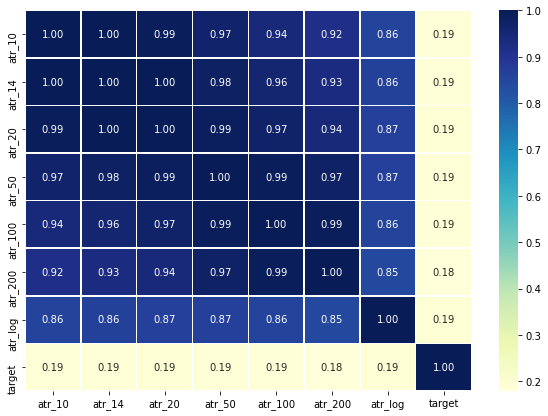

In [8]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# Investigation into base ATR

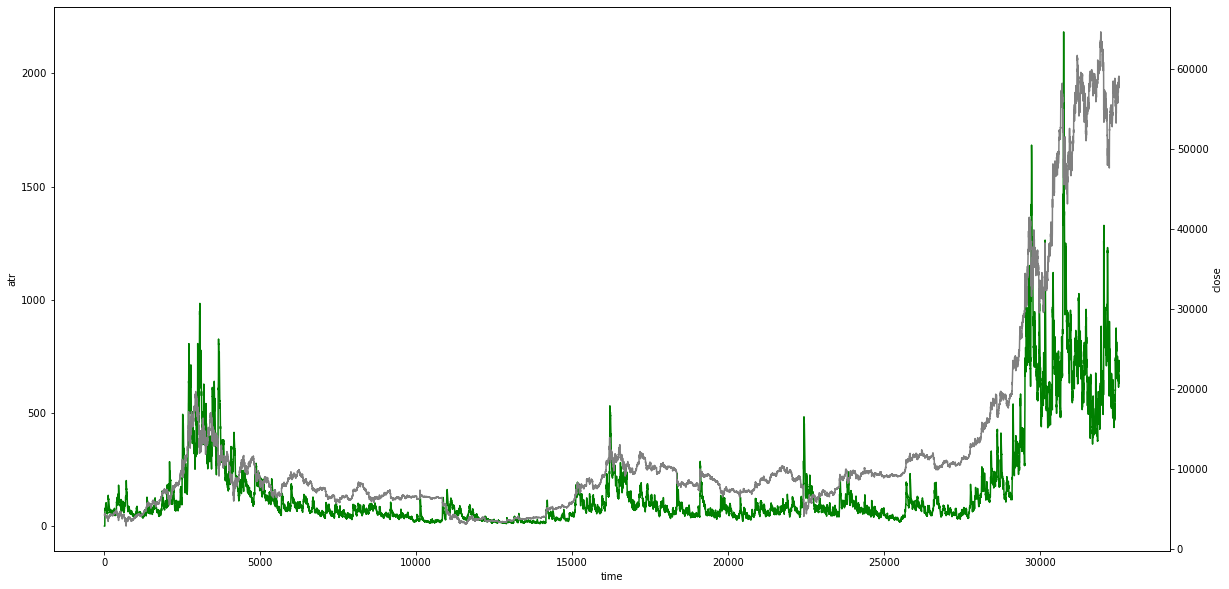

In [9]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.atr_14,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

### Atr relative to closing price
Results: Higher correlation: 0.21. Decent correlation with atr

In [13]:
df["atr_o_close"] = list(map(lambda a, c: a/c, df.atr_14, df.close))
df["atr_o_close_log"] = list(map(lambda a, c: np.log(a/c), df.atr_14, df.close))

<ipython-input-13-0322520d6922>:2: RuntimeWarning: divide by zero encountered in log
  df["atr_o_close_log"] = list(map(lambda a, c: np.log(a/c), df.atr_14, df.close))


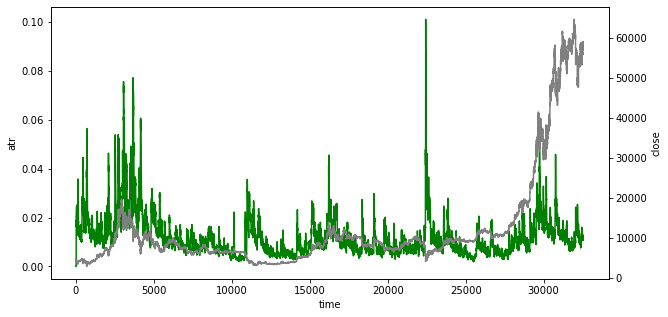

In [14]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df.atr_o_close,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
plt.show()

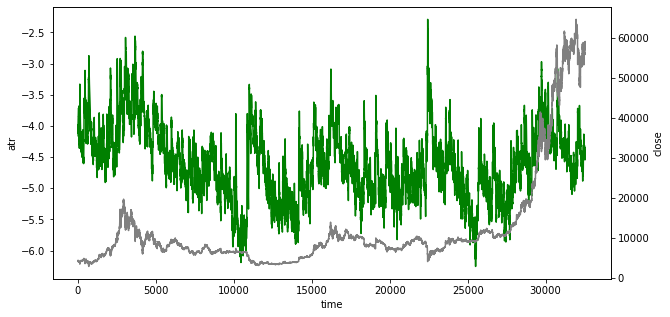

In [15]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df.atr_o_close_log,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
plt.show()

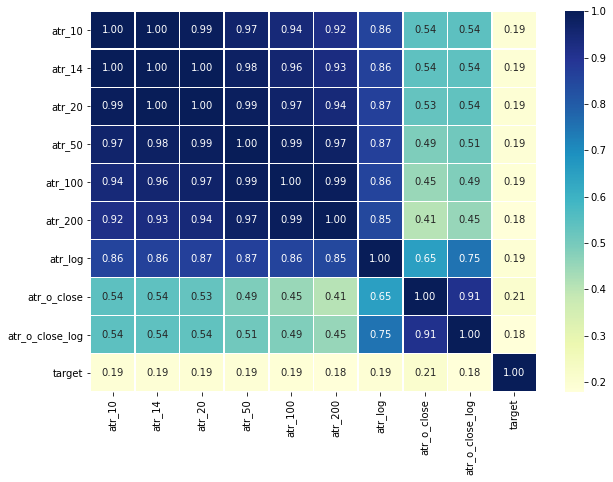

In [16]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Atr rate of change
Purpose: Find the rate of change (slope or first derivative) of ATR

Results: No correlation

In [29]:
df["atr_ma"] = uf.get_moving_average(df.atr_14, window=14)
df["atr_rate"] = uf.get_rate(df.atr_ma)
df["atr_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df.atr_rate))

In [30]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,atr_20,atr_50,atr_100,atr_200,atr_log,atr_o_close,atr_o_close_log,atr_ma,atr_rate,atr_rate_log
0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,202366.138393,171,35.160503,...,0.0,0.0,0.0,0.0,0.0,0.0,-inf,NaN,NaN,NaN
1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,100304.823567,102,21.448071,...,0.0,0.0,0.0,0.0,0.0,0.0,-inf,NaN,NaN,NaN
2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,31282.312670,36,4.802861,...,0.0,0.0,0.0,0.0,0.0,0.0,-inf,NaN,NaN,NaN
3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,19241.058300,25,2.602292,...,0.0,0.0,0.0,0.0,0.0,0.0,-inf,NaN,NaN,NaN
4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4239.503586,28,0.814655,...,0.0,0.0,0.0,0.0,0.0,0.0,-inf,NaN,NaN,NaN


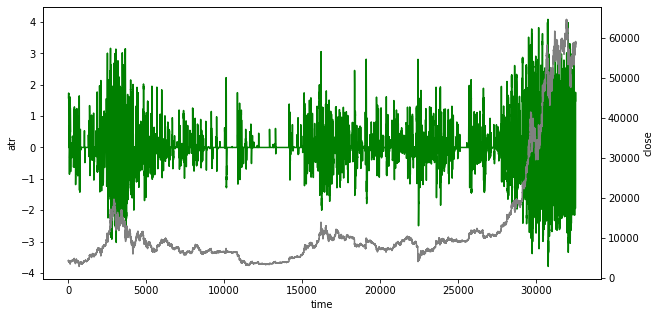

In [31]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df.atr_rate_log,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
plt.show()

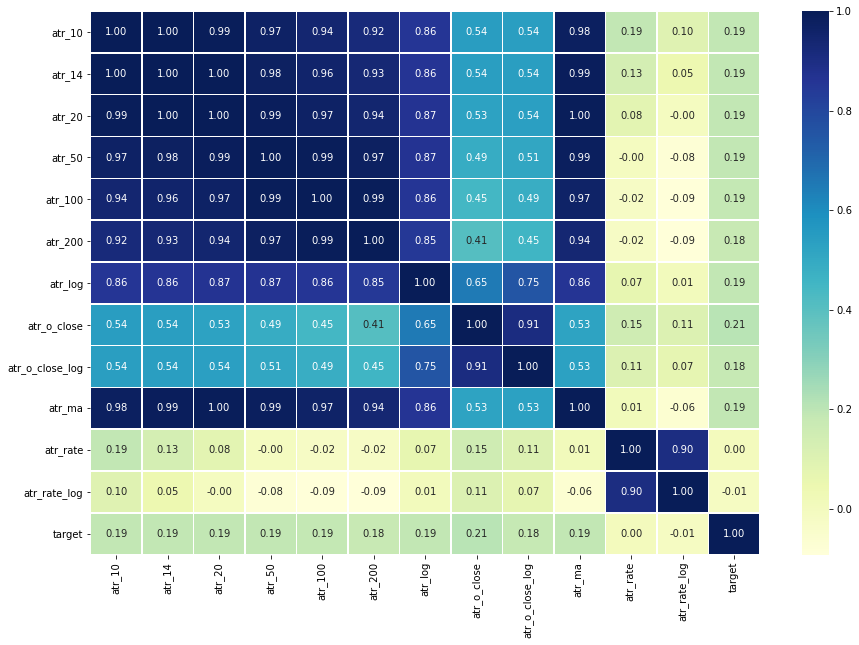

In [32]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Second derivative

In [39]:
df["atr_ma_2"] = uf.get_moving_average(df.atr_ma, window=14)
df["atr_rate_2"] = uf.get_rate(df.atr_ma_2)
df["atr_rate_2_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df.atr_rate_2))

In [40]:
df.tail()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,atr_200,atr_log,atr_o_close,atr_o_close_log,atr_ma,atr_rate,atr_rate_log,atr_ma_2,atr_rate_2,atr_rate_2_log
32531,2021-05-08 15:00:00,58947.47,58947.48,57472.95,57599.87,5851.539191,1620489599999,3.408746e+08,140494,2843.709612,...,672.097007,6.553275,0.012180,-4.408001,648.193967,3.103211,1.132437,663.119592,-2.926821,-1.073917
32532,2021-05-08 16:00:00,57599.86,58500.00,57560.63,58381.14,4739.339671,1620493199999,2.753576e+08,137969,2172.633797,...,673.433371,6.577202,0.012307,-4.397547,651.735827,3.541859,1.264652,660.567118,-2.552475,-0.937063
32533,2021-05-08 17:00:00,58381.14,59050.45,58139.91,58898.98,3815.391269,1620496799999,2.241230e+08,108370,1870.545827,...,674.618905,6.596110,0.012432,-4.387469,657.532247,5.796421,1.757241,658.672899,-1.894218,-0.638806
32534,2021-05-08 18:00:00,58901.45,59251.04,58901.45,59060.57,2937.039406,1620500399999,1.734920e+08,105800,1551.876404,...,673.006110,6.558319,0.011938,-4.428000,661.396372,3.864125,1.351735,657.234136,-1.438764,-0.363784
32535,2021-05-08 19:00:00,59060.57,59300.00,58863.18,59030.56,2046.451760,1620503999999,1.209274e+08,69573,995.880816,...,671.825180,6.530766,0.011620,-4.455044,665.803366,4.406994,1.483193,656.376464,-0.857671,0.000000


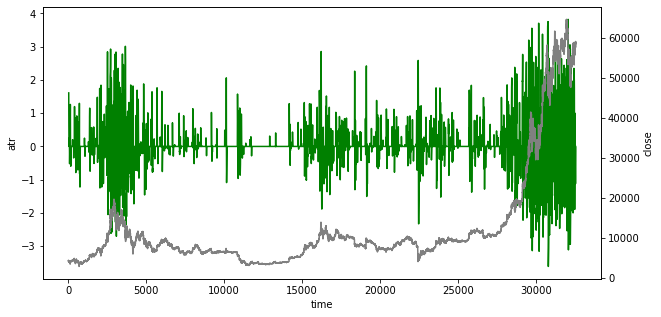

In [41]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df.atr_rate_2_log,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
plt.show()

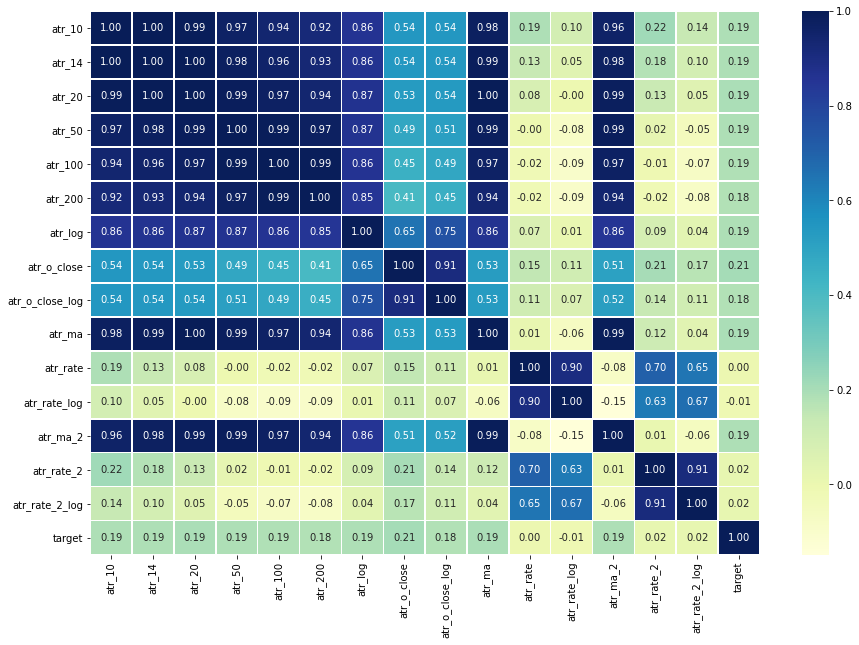

In [42]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Feature importance

In [65]:
d = df.copy()
d.dropna(inplace=True)
close = d["close"]
d = d[list(indicators)].copy()

X = d.drop(["target"], axis=1)
y = d["target"]

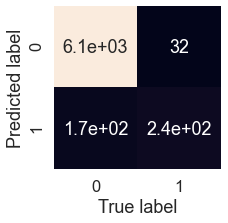

In [54]:
crg.plot_conf_matrix(X, y)

In [55]:
crg.generate_report(X, y, remind=True)

{'precision': 0.13928410456928458,
 'recall': 0.2512512436871072,
 'f1': 0.07884769198407554,
 'remind': {'Precision': 'Portion of guessed positives that are actually correct',
  'Recall': 'Portion of actual positives that are guessed correct',
  'F1': 'Balance, use if uneven class distribution (ie large # actual negatives)'}}

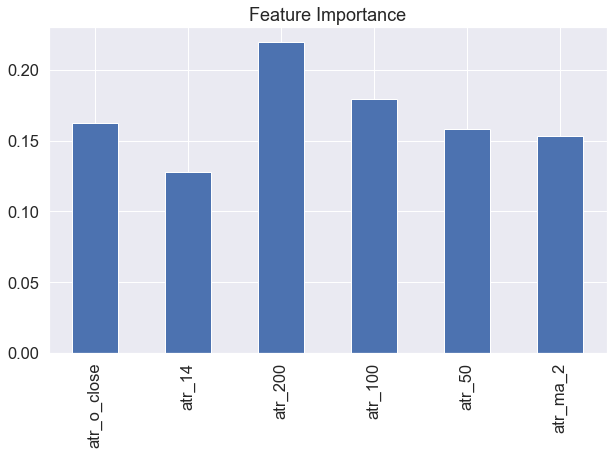

In [76]:
crg.feature_importance(X, y, plot=True)

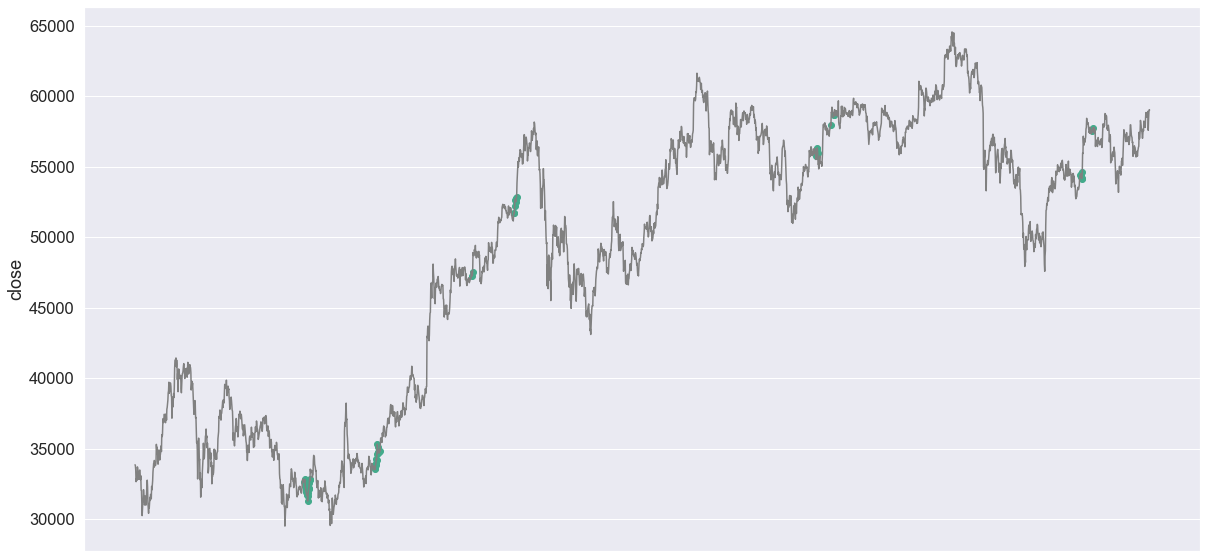

In [59]:
crg.foward_test(X, y, close, mistakes=False)

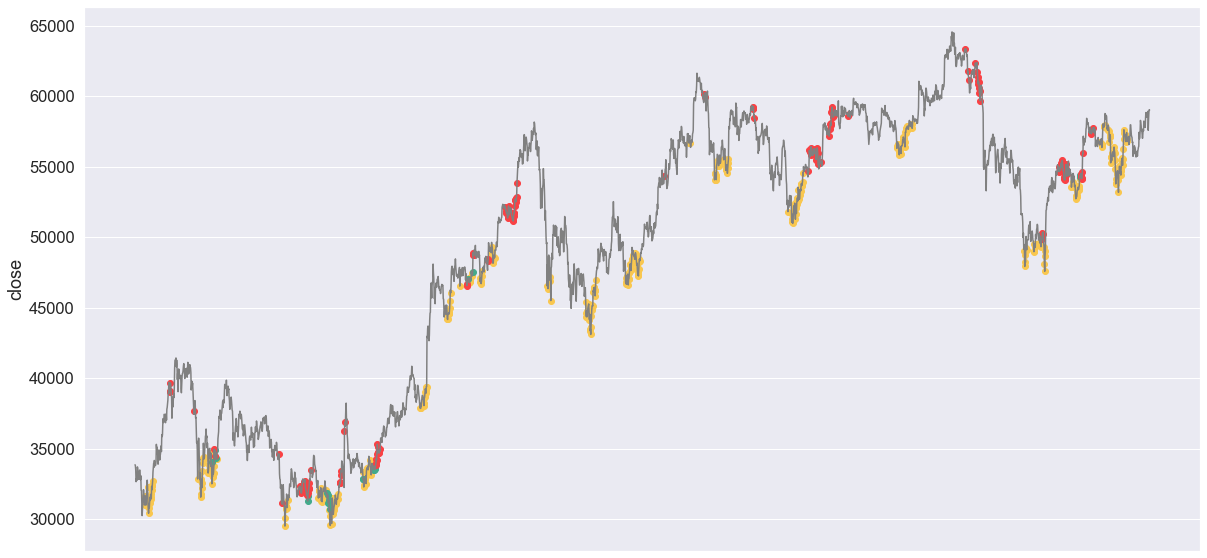

In [60]:
crg.foward_test(X, y, close, mistakes=True)

In [74]:
X = X[["atr_o_close", "atr_14", "atr_200", "atr_100", "atr_50", "atr_ma_2"]]

In [75]:
crg.generate_report(X, y)

{'precision': 0.21089082852359073,
 'recall': 0.249744965428647,
 'f1': 0.08291540171319414}